# Problems from Mahan's Many Particle Physics
## Problem 1
Solve the clasitical vibrational modes of a one D chain of attoms of type A and B they alternate on the chain with masses $m_A$ and $m_B$. The harmonic spring between the attoms has spring constant K. 
## Approach:
The classical hamiltonain for the phonon in a diatomic chain is:
$$
H = \sum_{\substack{i}}(P_{i}^2/(2*m_A)+P_{i}^2/(2*m_B) + K*(x_i-x_{i+1})^2) 
$$
Leading to the following equations of motion: 
$$
m_A\"x_i = K*(2*x_i-x_{i+1}-x_{i-1}) i = 0,2,4,6,8
$$
$$
m_B\"x_{i} =  K*(2*x_{i}-x_{i+1}-x_{i-1}), i = 1,2,3,4
$$
using a planewave ansatz we can find a solution directly (seen in ibach luth page 64)
Giving the result: 

$$
\sqrt{K*(\frac{1}{m_a}+\frac{1}{m_b})\pm K*\sqrt{(\frac{1}{m_a}+\frac{1}{m_b})^2-\frac{4}{m_a*m_b}*sin^2(\pi*2*k*a/2)}}
$$
or alternatively we can find eigen solutions to a large enough equivalent matrix (see below)


In [4]:
import numpy as np
import matplotlib.pyplot as plt 

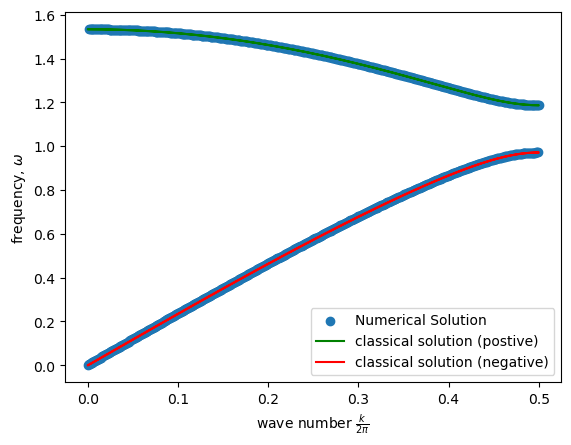

In [15]:
m_a = 1.42#mass of atom type b
m_b = 2.12 #mass of atom type  a
K = 1 #spring constant
N = 1000# number of a lattice sites 
a = 1#lattice site pitch 
A = np.asarray([[K/m_a*(i%2==0)*(2*(j==i)-(j==i+1)-(j==i-1))
      +K/m_b*(i%2==1)*(2*(j==i)-(j==i+1)-(j==i-1))for i in range(N)] for j in range (N)]) 

omega,fx = np.linalg.eig(A)

k = np.fft.fftfreq(N,a)#generate spatial frequency space 
plt.scatter(np.abs(k),np.sqrt(np.sort(omega)),label = 'Numerical Solution')
plt.plot(np.abs(k),np.sqrt(K*(1/m_a+1/m_b)+K*np.sqrt((1/m_a+1/m_b)**2-4/(m_a*m_b)*np.sin(np.pi*2*k*a/2)**2)),color='g',label='classical solution (postive)')
plt.plot(np.abs(k),np.sqrt(K*(1/m_a+1/m_b)-K*np.sqrt((1/m_a+1/m_b)**2-4/(m_a*m_b)*np.sin(np.pi*2*k*a/2)**2)),color='r',label='classical solution (negative)')
plt.xlabel(r'wave number $\frac{k}{2\pi}$')
plt.ylabel("frequency, $\omega$")
plt.legend()

## Problem 2: 
Write down the Hamiltonian of problem 1, solve it quantum mechanically and show that it may be reduced to the form 
$$
H  =\sum_{\substack{k,\lambda}} \omega_{k,\lambda}(a_{k,\lambda} a^\dagger_{k,\lambda} +\frac{1}{2})
$$ 
where $\omega_{k,\lambda}$ are the classic normal mode frequencies. 





## Approach:  
We need to define a set of normal coordinates taking a similar route to before we choose the following momentum space coordinates:
$$ 
x_l = x_k 
p_l = x_k